In [ ]:
'''
Задание 1
Дана матрица рейтингов фильмов (строки - пользователи (10 человек),
столбцы - фильмы (15 фильмов))

a) Необходимо найти наиболее похожего пользователя по косинусной метрике
для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь
на пользователя x).
'''

In [58]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import minimize
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
%matplotlib inline

In [38]:
ratings = np.array([ [ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

In [44]:
result = []
for i in range(len(ratings)):
    x = raitings[i].reshape(1, -1)
    opt = -1.0
    opt_j = -1
    for j in range(len(ratings)):
        if i == j:
            continue
       
        y = raitings[j].reshape(1, -1)
        cs = cosine_similarity(x, y)[0][0]
        
        if cs > opt:
            opt = cs 
            opt_j = j
    result.append(f'({i}, {opt_j}): {opt}')

print(result)

['(0, 8): 0.9106598233573044', '(1, 4): 0.8713805223930228', '(2, 9): 0.9187305147356807', '(3, 9): 0.8588686958710949', '(4, 8): 0.8794847716076251', '(5, 9): 0.8551490764118892', '(6, 3): 0.8327421070557631', '(7, 5): 0.8445168512565342', '(8, 0): 0.9106598233573044', '(9, 2): 0.9187305147356807']


In [ ]:
'''
b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов,
до, скажем, 5-ти признаков, как вы это сделаете?
'''

In [68]:
print(f'Reduced ratings: {PCA(n_components=5).fit_transform(ratings)}')

Reduced ratings: [[-5.30986101  1.92919845 -4.93300027  2.70188013  5.50497886]
 [ 2.87763403  2.71659559  1.40592782  7.26325751 -4.50322291]
 [-4.94010408 -6.68861167 -0.94550184  3.61556661 -0.68969272]
 [ 5.14939908 -6.28027284 -4.65978558  1.09024004 -1.01471112]
 [-1.37488691  7.54357985  4.00834369  2.1284001  -0.16324949]
 [ 2.65341956 -3.77075601  8.58430748 -1.46628319  1.67401769]
 [ 8.61573944  3.78603335 -4.02721027 -4.37582577 -3.13880277]
 [ 5.39658258 -1.0170466   1.01456742 -1.89512837  6.54883538]
 [-5.7843488   5.29857107 -1.48083611 -3.71295542  0.21312695]
 [-7.2835739  -3.51729118  1.03318766 -5.34915166 -4.43127987]]


In [ ]:
'''
Задание 2
Вычислите производную tg^2(sin(x) + cos(2x+3)) в точке x_0=1 (на python и на бумаге).
'''

In [78]:
from scipy.misc import derivative
import math

def f(x):
    tmp = math.sin(x) + math.cos(2 * x + 3)
    return math.tan(tmp) ** 2

x = 1
print(f'f\'({x}):', derivative(f, x, n = 1, dx = 1e-6))

f'(1): 55.3859176464222


In [80]:
'''
Сделаем вид что это бумага:)
'''

from sympy import symbols, diff, sin, cos, tan
x = symbols('x', real=True)
f = tan(sin(x) + cos(2 * x + 3)) ** 2
print('f\'(x):', diff(f, x))

f'(x): 2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))


In [ ]:
'''
Задание 3
Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx
в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error.
'''

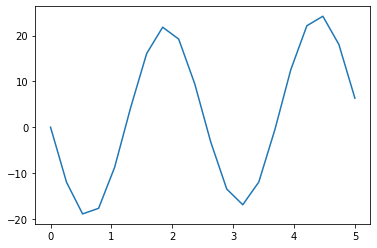

In [83]:
from scipy.optimize import differential_evolution

def f(x, a, b):
    return np.e ** a * np.sin(b * x) + x

x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

plt.plot(x, fx)
plt.show()

In [97]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

bounds = [(-300, 300), (-300, 300)]
res = differential_evolution(error, bounds)

print(f'a = {res.x[0]:.2f}, b = {res.x[1]:.2f}')

a = 3.00, b = 69.13


In [ ]:
'''
Задание 4
Создайте собственную дискретную случайную величину с 20 значениями.
Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки.
Постройте гистограмму распределения средних.
'''

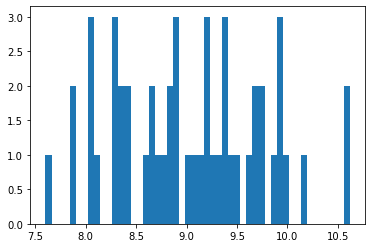

In [109]:
means = []
for i in range(50): means.append(np.random.randint(0, 19, 50).mean())
plt.hist(means, 50)
plt.show()

In [ ]:
'''
Задание 5
Найдите собственные значения и собственные вектора матрицы (на python и на бумаге):

m = np.array([[1, 4],
              [1, 1]])
print(m)
'''

In [111]:
m = np.array([[1, 4],
              [1, 1]])

print(np.linalg.eig(m))

(array([ 3., -1.]), array([[ 0.89442719, -0.89442719],
       [ 0.4472136 ,  0.4472136 ]]))
